In [2]:
#import hypernetx as hnx
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random
#from PyComplexHeatmap import *

import sys
sys.path.append('/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/v0.analysis/scripts/pythonScripts/functions/')
from incidenceToProjection import makeHiC_fromInc
#from chains import makeIncDF_fromChainDists
from chains import RealHiC
from utils import flatten

## Set up. 
dataDir = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/2023_03_01_v0_dataGathering/v0_hypergraphSimulations/getMultiwayInteractions_fromBPChains/'


In [3]:
## Read in example file
exMat1 = np.loadtxt(f'{dataDir}chains_500_10000_1500_1696950861/chain_dist_281.txt')
## Read in example file
exMat2 = np.loadtxt(f'{dataDir}chains_500_10000_1500_1696950861/chain_dist_38.txt')

nrow = exMat1.shape[0]
cutoff = 500

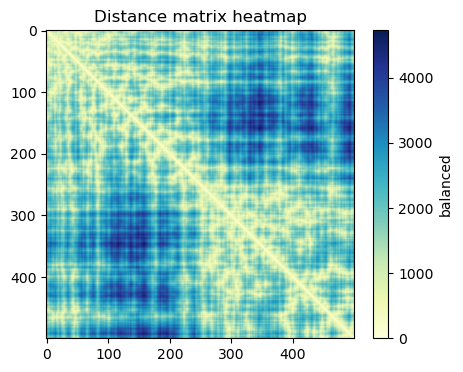

In [60]:
chainDir = f'{dataDir}chains_500_10000_1500_1696950861/'
num_files = 300
binaryInit = RealHiC(chainDir,num_files)
binMat = binaryInit.distMatToBinary(281)

plt.figure(figsize=(6, 4))
im = plt.imshow(exMat1, cmap="YlGnBu")
plt.colorbar(im, fraction=0.046, pad=0.04, label='balanced');
plt.title("Distance matrix heatmap")
plt.show()

In [136]:
def averageNChains(seed,sampleSize,matching_files):
    random.seed(seed)
    mat = None
    for f in random.sample(matching_files,sampleSize):
        oneChain = np.loadtxt(f)
        chainDFs.append(oneChain)
        if mat is None:
            mat = (oneChain / sampleSize)
        else:
            mat += (oneChain / sampleSize)
    return(mat)

In [127]:
distPattern = "chain_dist_*.txt"
matching_files = glob.glob(f'{dataDir}chains_500_10000_1500_1681171613/{distPattern}')
random.seed(10)
sampleSize = 4

avgMat = None
dfs = []
chainDFs = []

for f in random.sample(matching_files,sampleSize):
    oneChain = np.loadtxt(f)
    chainDFs.append(oneChain)
    if avgMat is None:
        avgMat = (oneChain / sampleSize)
    else:
        avgMat += (oneChain / sampleSize)
    chainDF = makeIncDF_fromChainDists(oneChain)
    print(chainDF.shape)
    dfs.append(chainDF)

combined_incDF = pd.concat(dfs,axis=1)
combined_incDF.shape

(500, 4327)
(500, 4295)
(500, 4251)
(500, 4009)


(500, 16882)

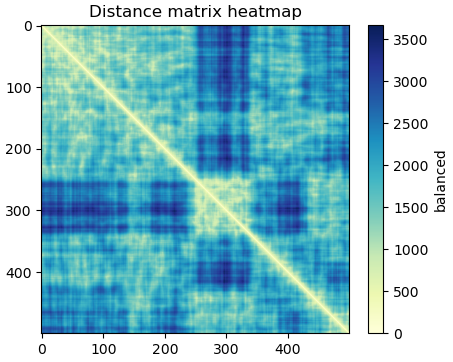

In [128]:
plt.figure(figsize=(6, 4))
im = plt.imshow(avgMat, cmap="YlGnBu")
plt.colorbar(im, fraction=0.046, pad=0.04, label='balanced');
plt.title("Distance matrix heatmap")
plt.show()

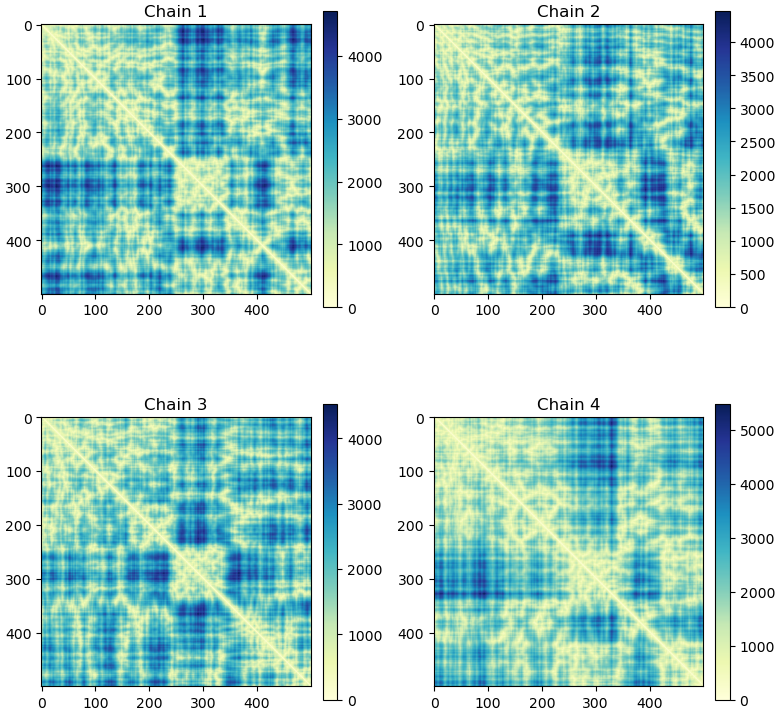

In [40]:

plt.figure(figsize=(8, 8))
 
for i, matrix in enumerate(chainDFs):
    plt.subplot(2, 2, i + 1)
    im = plt.imshow(matrix, cmap="YlGnBu")
    plt.colorbar(im, fraction=0.05, pad=0.04)
    plt.title(f"Chain {i+1}")

plt.tight_layout()
plt.show()

In [16]:
print(chainDFs[0][0:4,0:4])
print(chainDFs[1][0:4,0:4])
print(chainDFs[2][0:4,0:4])
print(chainDFs[3][0:4,0:4])
print(avgMat[0:4,0:4])


[[  0.         300.         477.01162647 569.98101192]
 [300.           0.         300.         458.46306381]
 [477.01162647 300.           0.         300.        ]
 [569.98101192 458.46306381 300.           0.        ]]
[[  0.         300.         510.28569579 524.34379442]
 [300.           0.         300.         414.19221507]
 [510.28569579 300.           0.         300.        ]
 [524.34379442 414.19221507 300.           0.        ]]
[[  0.         300.         407.21848358 396.99711687]
 [300.           0.         300.         477.52892767]
 [407.21848358 300.           0.         300.        ]
 [396.99711687 477.52892767 300.           0.        ]]
[[  0.         300.         524.44274295 584.14336124]
 [300.           0.         300.         354.56397584]
 [524.44274295 300.           0.         300.        ]
 [584.14336124 354.56397584 300.           0.        ]]
[[  0.         300.         479.7396372  518.86632111]
 [300.           0.         300.         426.1870456 ]
 [479.

In [26]:
oneChain = makeIncDF_fromChainDists(avgMat)
oneChain.shape

(500, 30)

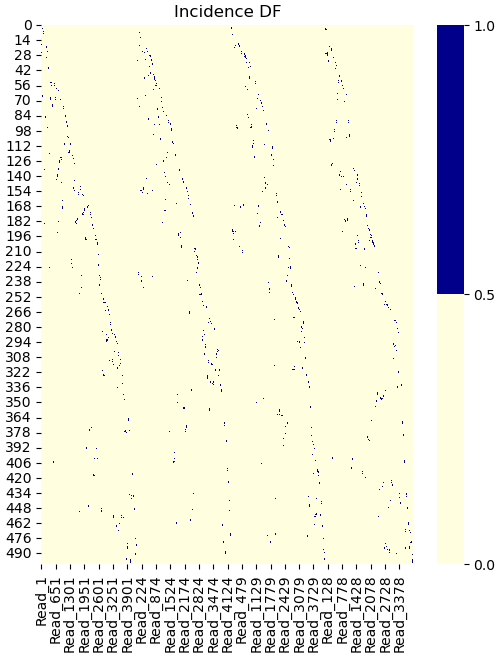

In [20]:
from matplotlib.colors import BoundaryNorm, ListedColormap

my_colors = ["lightyellow",'darkblue']
my_cmap = ListedColormap(my_colors)
bounds = [0, 0.5, 1]
my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))

plt.figure(figsize=(6, 7))
im = sns.heatmap(combined_incDF, cmap=my_cmap,norm = my_norm)
plt.title("Incidence DF")
plt.show()

In [253]:
## Convert incidence matrix to 2d hiC matrix
def makeHiC_fromInc(incDF):
    nrow = incDF.shape[0]
    ncol = incDF.shape[1]
    binIDs = list(incDF.index)
    df = pd.DataFrame(np.zeros(shape = (nrow,nrow)), index=binIDs, columns=binIDs)
    for read in incDF.columns:
        arr = incDF[read][incDF[read] == 1].index
        for a in arr:
            df.loc[a][a] += 1
        combs = list(combinations(arr,2))
        for c in combs:
            df.loc[c[0]][c[1]] += 1
            df.loc[c[1]][c[0]] += 1
    return(df)

In [291]:
hic_mat = makeHiC_fromInc(df)

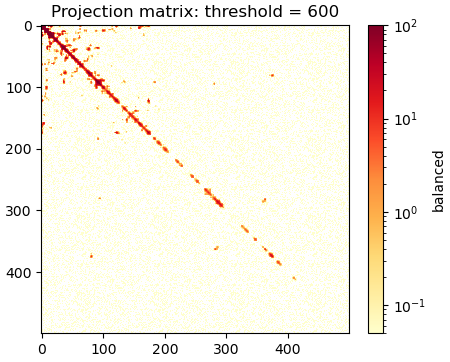

In [292]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(6, 4))
im = plt.imshow(hic_mat, cmap="YlOrRd",norm = LogNorm(vmax=100, vmin = 0.05))
plt.colorbar(im, fraction=0.046, pad=0.04, label='balanced');
plt.title(f"Projection matrix: threshold = {cutoff}")
plt.show()

In [23]:
#chain_dir = f'{dataDir}chains_500_10000_1500_1681171613/'
chain_dir = f'{dataDir}chains_500_10000_1500_1696950861/'
num_files = 1000
hic_processor = RealHiC(chain_dir,num_files)
hic1k = hic_processor.distFilesToRealHiC()

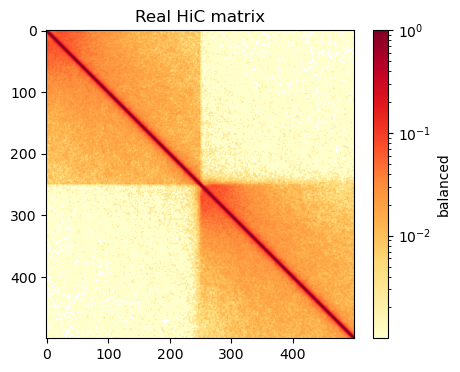

In [26]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(6, 4))
im = plt.imshow(hic1k, cmap="YlOrRd",norm = LogNorm())
plt.colorbar(im, fraction=0.046, pad=0.04, label='balanced');
plt.title(f"Real HiC matrix")
plt.show()

In [335]:
np.where(exMat1 < 500, 1, 0)

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [293]:
card = df.sum()

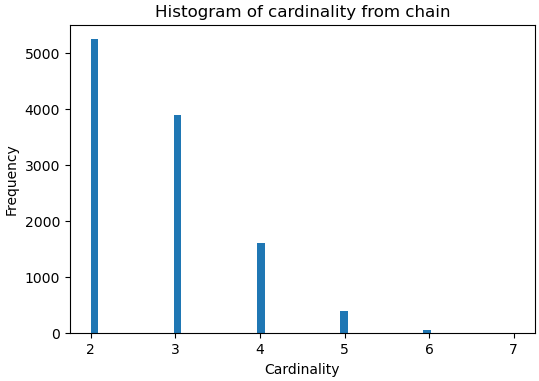

In [294]:
# Generate a histogram
plt.figure(figsize=(6,4))
plt.hist(card, bins='auto')

# Add labels and title
plt.xlabel('Cardinality')
plt.ylabel('Frequency')
plt.title('Histogram of cardinality from chain')

# Display the histogram
plt.show()

In [152]:
avgMat1 = averageNChains(seed=101,sampleSize=5,matching_files = matching_files)
chains1 = makeIncDF_fromChainDists(avgMat1)
print(chains1.shape)

avgMat2 = averageNChains(seed=102,sampleSize=5,matching_files = matching_files)
chains2 = makeIncDF_fromChainDists(avgMat2)
print(chains2.shape)

(500, 101)
(500, 85)


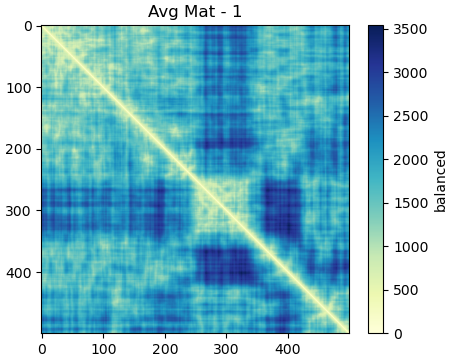

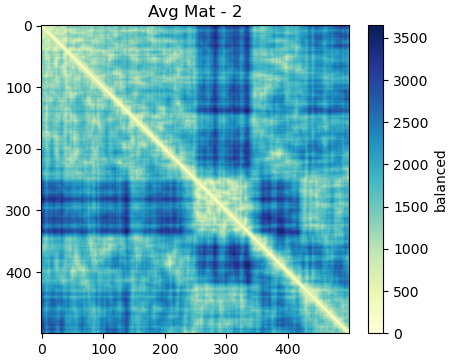

In [153]:
plt.figure(figsize=(6, 4))
im = plt.imshow(avgMat1, cmap="YlGnBu")
plt.colorbar(im, fraction=0.046, pad=0.04, label='balanced');
plt.title("Avg Mat - 1")
plt.show()

plt.figure(figsize=(6, 4))
im = plt.imshow(avgMat2, cmap="YlGnBu")
plt.colorbar(im, fraction=0.046, pad=0.04, label='balanced');
plt.title("Avg Mat - 2")
plt.show()

In [197]:
chains1_bin5 = increaseIncDF_binSize(chains1,5)
chains2_bin5 = increaseIncDF_binSize(chains2,5)

In [202]:
H1 = hnx.Hypergraph.from_incidence_dataframe(chains1)
H2 = hnx.Hypergraph.from_incidence_dataframe(chains2)

In [203]:
h1_nodes = []
for e in H1.edges:
    h1_nodes.append(tuple(H1.edges[e]))

h2_nodes = []
for e in H2.edges:
    h2_nodes.append(tuple(H2.edges[e]))

In [204]:
common_elements = set(h1_nodes).intersection(set(h2_nodes))
print(len(common_elements),len(h1_nodes),len(h2_nodes))

4 101 85


In [205]:
common_elements

{(53, 54), (53, 55), (54, 55), (281, 282)}

## SCRATCHPAD 

In [155]:
chains1 = makeIncDF_fromChainDists(exMat1,500)
chains2 = makeIncDF_fromChainDists(exMat2,500)

In [157]:
chains1by5 = increaseIncDF_binSize(chains1,5)
chains1by5 = chains1by5.loc[:,chains1by5.sum() >= 2]

In [158]:
chains2by5 = increaseIncDF_binSize(chains2,5)
chains2by5 = chains2by5.loc[:,chains2by5.sum() >= 2]

In [33]:
def increaseIncDF_binSize(df,binSize):
    result = []
    names = []
    for i in range(0,len(df) - binSize,binSize):
        summed_value = df.loc[i:i+binSize-1,:].sum()
        summed_value[summed_value > 0] = 1
        names.append(f"Bin{i}:{i+binSize-1}")
        result.append(summed_value)
    result_df = pd.DataFrame(result,index = names)
    return(result_df)

In [176]:
def dfToDict(df,result_dict):
    for col in df.columns:
        indices = df.index[df[col] == 1].tolist()
        key = '_'.join(indices)

        result_dict[key] = result_dict.get(key, 0) + 1
    return(result_dict)

In [134]:
def dictToDF(hpDict):
    indices = list(set(flatten([key.split('_') for key in hpDict.keys()])))
    columns = []
    colnames = []
    counter = 0

    for key, value in hpDict.items():
        counter+=1
        col_ix = key.split('_')
        column = pd.Series([0] * len(indices),index = indices)  # Initialize row with zeros
        column[col_ix] = 1
        colName = f"Read{counter}:{value}"
        colnames.append(colName)
        columns.append(column)

    df = pd.concat(columns,axis=1)
    df.columns = colnames
    return(df)

In [177]:
emptyDict = {}
chains1_dict = dfToDict(chains1by5,emptyDict)
emptyDict = {}
chains2_dict = dfToDict(chains2by5,emptyDict)


In [135]:
chains1_new = dictToDF(chains1_dict)
chains1_new.shape

(99, 605)

In [183]:
def constructFullDict(listOfDFs):
    result_dict = {}
    for df in listOfDFs:
        result_dict = dfToDict(df,result_dict)
    return(result_dict)

In [186]:
fullDF = dictToDF(result_dict)

In [187]:
fullDF.shape

(99, 1115)

In [188]:
fullDF

,Read1:10,Read2:2,Read3:1,Read4:9,Read5:2,Read6:4,Read7:2,Read8:2,Read9:5,Read10:3,...,Read1106:1,Read1107:9,Read1108:4,Read1109:3,Read1110:1,Read1111:1,Read1112:1,Read1113:2,Read1114:1,Read1115:2
Bin195:199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bin100:104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bin150:154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bin375:379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bin20:24,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bin210:214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bin115:119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bin220:224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bin200:204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
